In [41]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy as sp
from scipy.sparse import csr_matrix

In [42]:
hf = h5py.File('output_digi_HDF_1000.h5', 'r')

In [43]:
events = []
for i in hf.keys():
    events.append(hf[i])

In [44]:
print(len(events))

2000


In [45]:
print(type(events))
print(events[0])

<class 'list'>
<HDF5 dataset "Event_[0]": shape (24,), type "|V48">


In [46]:
events[0][0]

(-2.4541297, 1.45075214, 834., 417, 6733.60577268, 0)

In [47]:
print(events[0].shape[0])

24


In [48]:
print(type(events[0][0]))

<class 'numpy.void'>


In [121]:
DETECTOR_LENGTH = 1000.0
DETECTOR_RADIUS = 275.0

x_disc = 128
y_disc = 128
z_disc = 128

x_inc = (2*DETECTOR_RADIUS)/x_disc
y_inc = (2*DETECTOR_RADIUS)/y_disc
z_inc = DETECTOR_LENGTH/z_disc

In [130]:
#DISCRETIZING SINGLE

discElements = x_disc*y_disc*z_disc

discretized_xyz = np.zeros([len(events[44]),5])
#discretized_xyz = np.zeros([events[0].shape[0]])
buckets = []
amplitudes = []
num_pts = 0
    
for point in events[44]:
    x_bucket = math.floor(((point[0]+DETECTOR_RADIUS)/(2*DETECTOR_RADIUS))*x_disc)
    y_bucket = math.floor(((point[1]+DETECTOR_RADIUS)/(2*DETECTOR_RADIUS))*y_disc)
    z_bucket = math.floor((point[2]/DETECTOR_LENGTH)*z_disc)

    bucket_num = z_bucket*x_disc*y_disc + x_bucket + y_bucket*x_disc
    
    #sparse matrix implementation
    buckets.append(bucket_num)
    amplitudes.append(point[4])
    
    
    avg_x = -DETECTOR_RADIUS + ((2*x_bucket+1)*x_inc)/2.0
    avg_y = -DETECTOR_RADIUS + ((2*y_bucket+1)*y_inc)/2.0
    avg_z = ((2*z_bucket+1)*z_inc)/2.0                          
    
#    print(type(times))
    discretized_xyz[num_pts] = [avg_x, avg_y, avg_z, float(point[3]), point[4]]
    
    num_pts += 1
    
#create csr matrix where data is chrage and row np.zeros(len(col)) of size (1, discElements)
cols = buckets
rows = np.zeros(len(cols))
data = amplitudes

#automatically sums data entries for data occuring at the same point
#no need for sum_duplicates()
discretized_data_sparse_CHARGE  = sp.sparse.csr_matrix((data, (rows, cols)), shape=(1, discElements))

In [112]:
#scatter plot coloring by charge
import seaborn as sns
from matplotlib.colors import LogNorm

In [113]:
ch_colors = sns.cubehelix_palette(n_colors=6, start=0, rot=-0.4,
                                  gamma=1, hue=1, light=0.75, dark=0.1)
ch_cm = sns.blend_palette(ch_colors, as_cmap=True)

Text(0.5, 0.92, 'downsampled with charge')

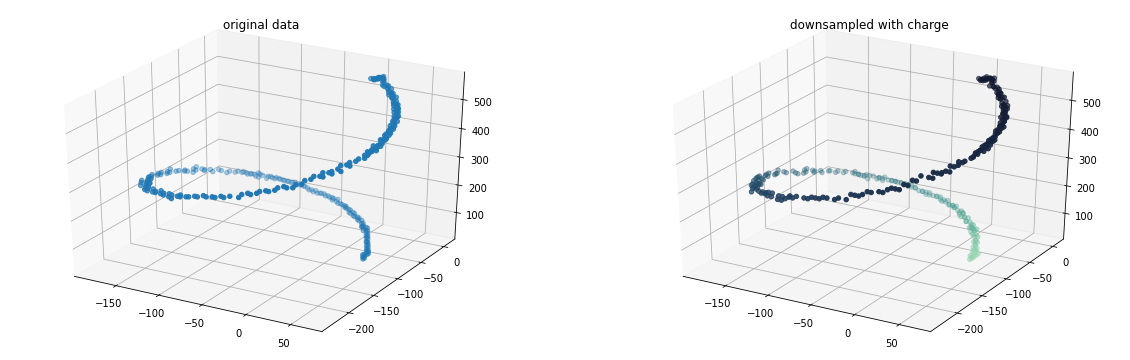

In [127]:
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter([item[0] for item in events[44]], [item[1] for item in events[44]], [item[2] for item in events[44]])
#ax.axis('equal')
ax.set_title("original data")

#######################################################################################################################
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(discretized_xyz[:,0], discretized_xyz[:,1], discretized_xyz[:,2], cmap=ch_cm, norm=LogNorm(), c=discretized_xyz[:,3])
#ax.axis('equal')
ax.set_title('downsampled with charge')

In [137]:
#DISCRETIZING A BUNCH
discElements = x_disc*y_disc*z_disc

buckets = []
amplitudes = []
downsampled = []

test_events = list(range(100))

for i in range(10):
    #evt = str(i)
    num_pts = 0
    discretized_xyz = np.zeros([len(events[i]),5])
    for point in events[i]:
        x_bucket = math.floor(((point[0]+DETECTOR_RADIUS)/(2*DETECTOR_RADIUS))*x_disc)
        y_bucket = math.floor(((point[1]+DETECTOR_RADIUS)/(2*DETECTOR_RADIUS))*y_disc)
        z_bucket = math.floor((point[2]/DETECTOR_LENGTH)*z_disc)

        bucket_num = z_bucket*x_disc*y_disc + x_bucket + y_bucket*x_disc
    
        #sparse matrix implementation
        buckets.append(bucket_num)
        amplitudes.append(point[4])
    
        avg_x = -DETECTOR_RADIUS + ((2*x_bucket+1)*x_inc)/2.0
        avg_y = -DETECTOR_RADIUS + ((2*y_bucket+1)*y_inc)/2.0
        avg_z = ((2*z_bucket+1)*z_inc)/2.0                          
    
        discretized_xyz[num_pts] = [avg_x, avg_y, avg_z, float(point[3]), point[4]]
    
        num_pts += 1

    #create csr matrix where data is chrage and row np.zeros(len(col)) of size (1, discElements)
    cols = buckets
    rows = np.zeros(len(cols))
    data = charges

    #automatically sums data entries for data occuring at the same point
    #no need for sum_duplicates()
#    discretized_data_sparse_CHARGE  = sp.sparse.csr_matrix((data, (rows, cols)), shape=(1, discElements))

    downsampled.append(discretized_xyz)
#    f.create_dataset(i, data=discretized_xyz)

In [138]:
print(len(downsampled))

10


In [139]:
print(downsampled[0])

[[-2.14843750e+00  2.14843750e+00  8.32031250e+02  4.17000000e+02
   6.73360577e+03]
 [-2.14843750e+00  2.14843750e+00  8.32031250e+02  4.17000000e+02
   1.25854633e+04]
 [-2.14843750e+00 -2.14843750e+00  8.32031250e+02  4.17000000e+02
   1.70520808e+03]
 [ 2.14843750e+00 -2.14843750e+00  9.02343750e+02  4.50000000e+02
   3.77884522e+03]
 [-2.14843750e+00 -2.14843750e+00  9.02343750e+02  4.50000000e+02
   1.13686783e+04]
 [ 2.14843750e+00  2.14843750e+00  9.64843750e+02  4.81000000e+02
   3.21076480e+03]
 [ 6.44531250e+00 -6.44531250e+00  9.64843750e+02  4.82000000e+02
   4.45706507e+01]
 [ 2.14843750e+00  6.44531250e+00  9.64843750e+02  4.83000000e+02
   2.11128009e+01]
 [-2.14843750e+00 -6.44531250e+00  9.80468750e+02  4.92000000e+02
   1.90553867e+01]
 [-6.44531250e+00  6.44531250e+00  9.88281250e+02  4.93000000e+02
   1.97473273e+01]
 [ 6.44531250e+00  6.44531250e+00  9.88281250e+02  4.93000000e+02
   2.12675051e+01]
 [-6.44531250e+00  2.14843750e+00  9.88281250e+02  4.95000000e+02

In [140]:
print(len(downsampled[0]))

24


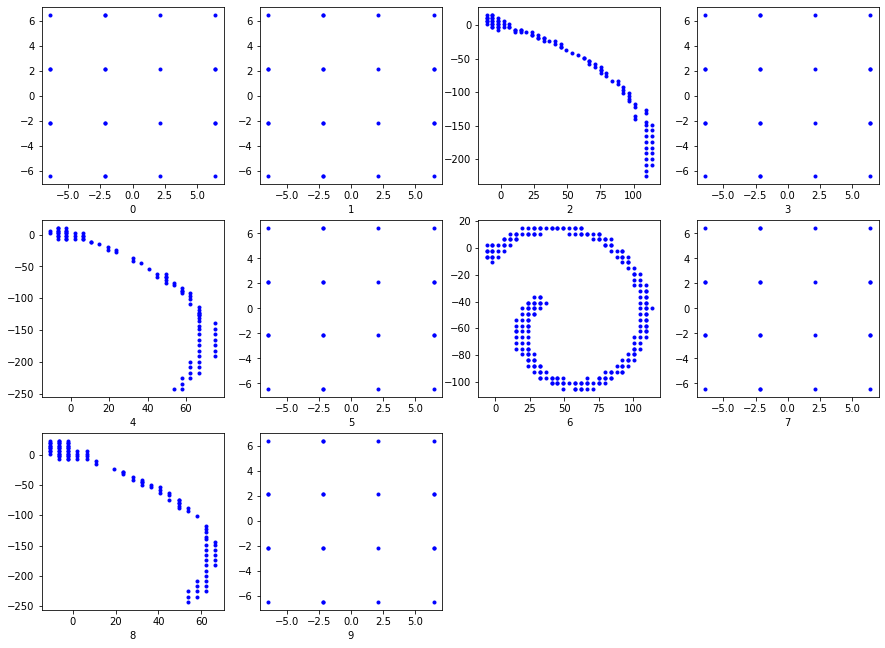

In [141]:
#xy plot
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(4,4,i+1)
    plt.xticks()
    plt.yticks()
    plt.grid(False)
    plt.plot(downsampled[i][:,0],downsampled[i][:,1], 'b.')
    plt.xlabel(i)
plt.show()

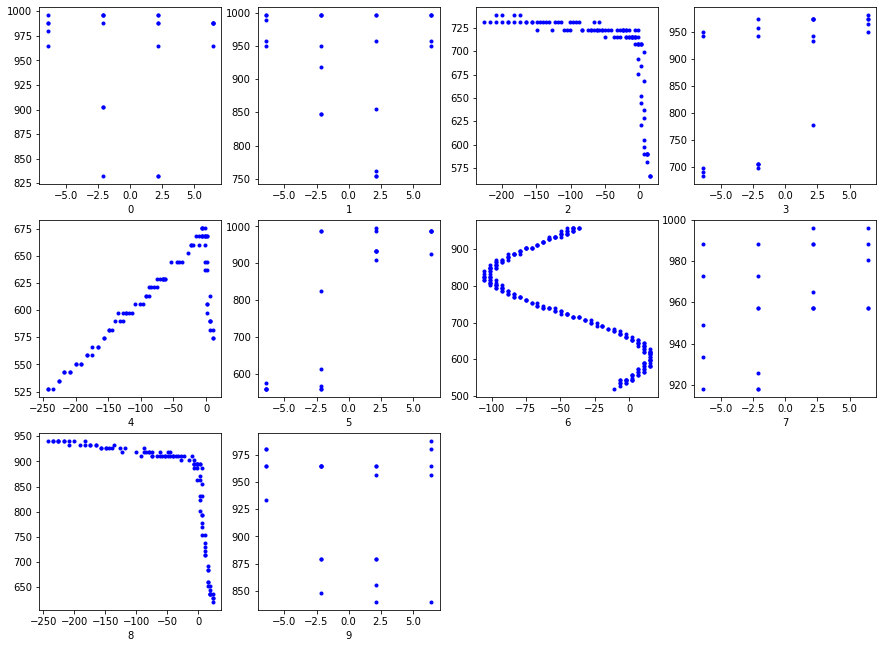

In [142]:
#yz plot
plt.figure(figsize=(15,15))
for i in range(10):
    x = str(i)
    plt.subplot(4,4,i+1)
    plt.xticks()
    plt.yticks()
    plt.grid(False)
    plt.plot(downsampled[i][:,1],downsampled[i][:,2], 'b.')
    plt.xlabel(i)
plt.show()

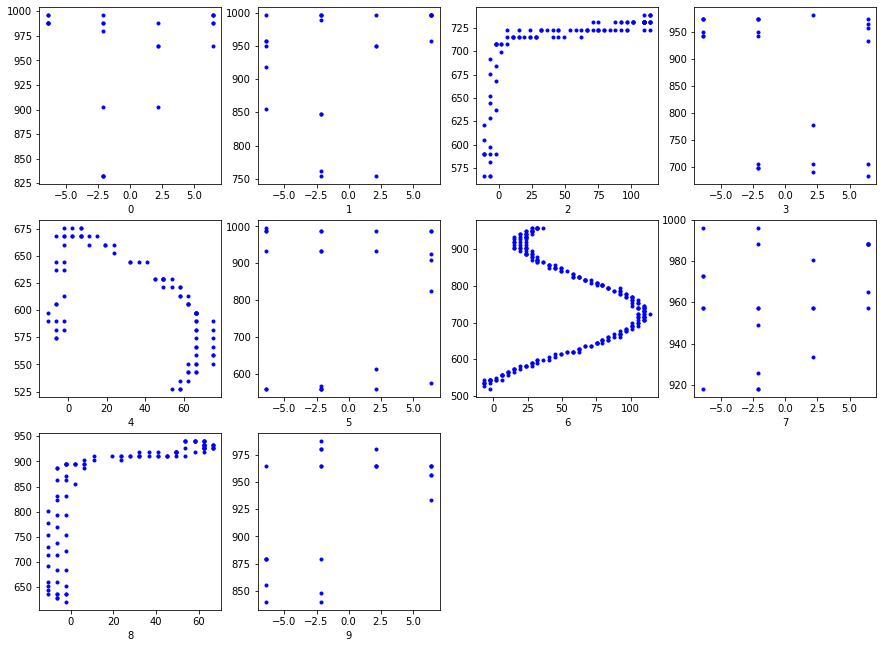

In [143]:
#xz plot
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(4,4,i+1)
    plt.xticks()
    plt.yticks()
    plt.grid(False)
    plt.plot(downsampled[i][:,0],downsampled[i][:,2], 'b.')
    plt.xlabel(i)
plt.show()

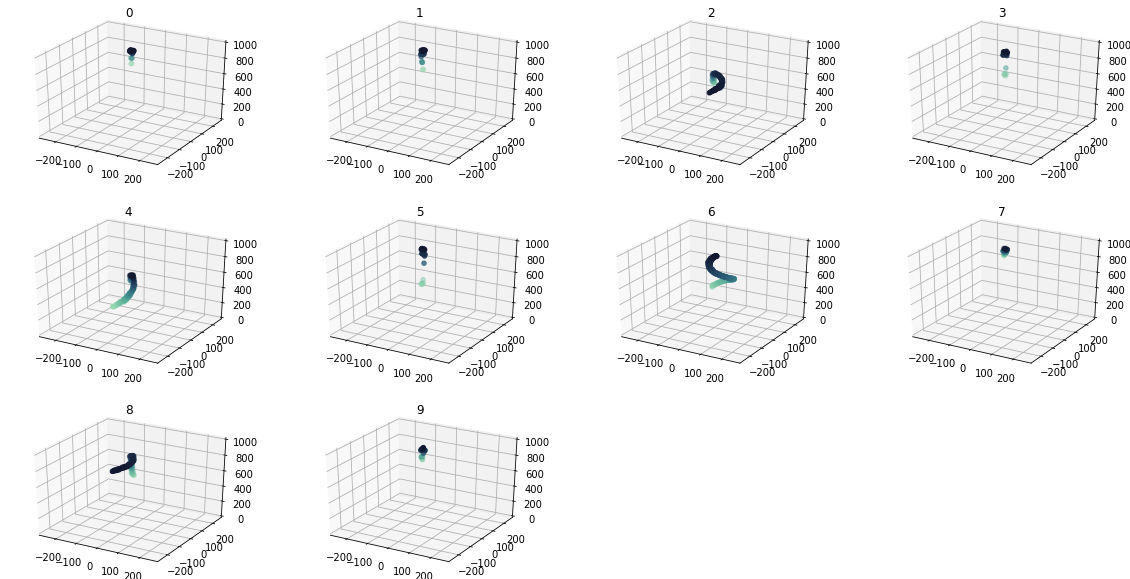

In [145]:
#plot 3d
fig = plt.figure(figsize=(20, 14))
for i in range(10):
    ax = fig.add_subplot(4, 4, i+1, projection='3d')
    ax.set_xlim3d(left=-270.0, right=270.0) 
    ax.set_ylim3d(bottom=-270.0, top=270.0) 
    ax.set_zlim3d(bottom=0.0, top=1000.0)
    ax.scatter(downsampled[i][:,0], downsampled[i][:,1], downsampled[i][:,2], cmap=ch_cm, norm=LogNorm(), c=downsampled[i][:,3])
    ax.set_title(i) 
plt.show()